# Effects of users features on bike-sharing use
## by Karina Condeixa

## Investigation Overview
In this analysis, I investigate users' features and related them to trips, which can be used to predict the demand for bikes. The main focus was on the members' age, gender, and type, but the duration of trips, weekdays of trips start, and if bikes were shared for all trips also were explored variables.    

## Dataset Overview
After a previous wranging data, there are 170999 bike trips with 13 features: duration_sec, duration_sec_log, duration_sec_sqrt,duration_sec_cbrt, bike_id, start_station_name, end_station_name, user_type, member_gender, member_age, age_grouped, bike_share_for_all_trip.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import matplotlib.ticker as ticker
from matplotlib.ticker import EngFormatter

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('./bikes.csv')

In [3]:
#Data wrangling, removing Unnamed: 0 column
bikes = bikes.drop(columns=['Unnamed: 0'])
bikes.head(3)

,duration_sec,weekdays_start,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_sec_log,duration_sec_sqrt,duration_sec_cbrt,member_age,age_grouped
0,60863,Monday,San Francisco Caltrain Station (King St at 4th...,San Francisco Caltrain Station (King St at 4th...,12904,Customer,Female,No,11.016381,246.704276,39.335480,29.0,18-29
1,5615,Monday,Jones St at Post St,Cyril Magnin St at Ellis St,10737,Customer,Male,No,8.633197,74.933304,17.773921,34.0,30-39
2,1272,Monday,Sanchez St at 15th St,Valencia St at 21st St,1349,Subscriber,Male,No,7.148346,35.665109,10.835003,30.0,18-29


In [4]:
s = bikes.member_gender
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Male,128519,0.751577,75.2%
Female,39875,0.233188,23.3%
Other,2605,0.015234,1.5%


In [5]:
#Renames the column
bikes = bikes.rename(columns = {'weekdays_start':'weekdays'})

bikes.head(2)

,duration_sec,weekdays,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_sec_log,duration_sec_sqrt,duration_sec_cbrt,member_age,age_grouped
0,60863,Monday,San Francisco Caltrain Station (King St at 4th...,San Francisco Caltrain Station (King St at 4th...,12904,Customer,Female,No,11.016381,246.704276,39.335480,29.0,18-29
1,5615,Monday,Jones St at Post St,Cyril Magnin St at Ellis St,10737,Customer,Male,No,8.633197,74.933304,17.773921,34.0,30-39


In [7]:
bikes.describe()

,duration_sec,bike_id,duration_sec_log,duration_sec_sqrt,duration_sec_cbrt,member_age
count,170999.000000,170999.000000,170999.000000,170999.000000,170999.000000,170999.000000
mean,713.529763,7286.698413,6.308851,24.825320,8.397959,33.914947
std,1402.360424,4404.651340,0.664465,9.860721,1.997118,10.155251
min,61.000000,12.000000,4.110874,7.810250,3.936497,18.000000
25%,358.000000,2446.000000,5.880533,18.920888,7.100588,27.000000
50%,560.000000,9777.000000,6.327937,23.664319,8.242571,31.000000
75%,851.000000,10636.000000,6.746412,29.171904,9.476396,39.000000
max,85035.000000,13007.000000,11.350818,291.607613,43.974331,129.000000


In [6]:
# sorts the variables in proper types
ordinal_var_dict = {'weekdays': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}

nominal_var_dict = {'user_type': ['Customer','Subscriber'],
                    'member_gender': ['Female', 'Male', 'Other'],
                    'age_grouped':['18-29', '30-39', '40-49', '50-59', '60-69', '70+']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bikes[var] = bikes[var].astype(ordered_var)

for var in nominal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = nominal_var_dict[var])
    bikes[var] = bikes[var].astype(ordered_var)
    

**Types of variables:**<BR>
numeric_vars = ['duration_sec_log','member_age','duration_sec_log', 
                'duration_min', 'member_age','bike_id']<BR>
categoric_vars = ['weekdays', 'user_type', 'member_gender']<BR><BR>
**numeric vars:**<BR>
quantitative_contiguous = ['duration_sec', 'duration_sec_log', 
'duration_min', 'member_age','bike_id'] <BR>
quantitative_binarious = ['bike_share_for_all_trip']<BR>

**categorical vars:**<BR>
categoric_ordinal = ['weekdays_start', 'user_type', 'member_gender', 'age_grouped']<BR>
categoric_nominal = ['start_station_name', 'end_station_name']<BR>


In [8]:
samples_bikes = np.random.choice(bikes.shape[0], 2000, replace = False)
bikes_samp500 = bikes.loc[samples_bikes,:]

## Distribution of member gender

Looked at the variable member_gender considering the number of trips in September in 2019, the male is the gender with the majority of occurrences.


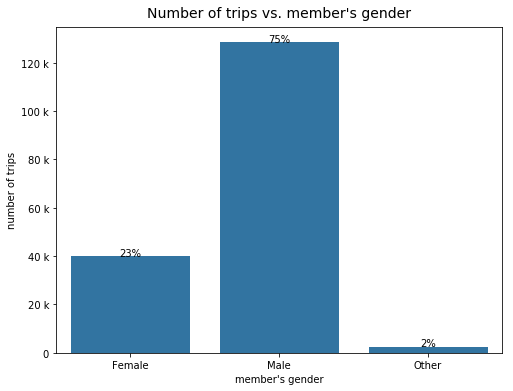

In [9]:
plt.figure(figsize = [8,6])
# create the plot 
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_gender', color = base_color)
plt.title("Number of trips vs. member's gender", fontsize=14, y=1.01)
plt.ylabel('number of trips')
plt.xlabel("member's gender")


# add annotations
n_points = bikes.shape[0]
cat_counts = bikes['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    ## get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    
        # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.gca().yaxis.set_major_formatter(EngFormatter())

## Distribution of members' age

The plot of members' age, considering the number of trips, it was found the majority of frequency in trips was found between members of 22 and 39 years old. Outliers are observed, with members extremely old. The histogram is right-skewed, so the mean is greater than the median.


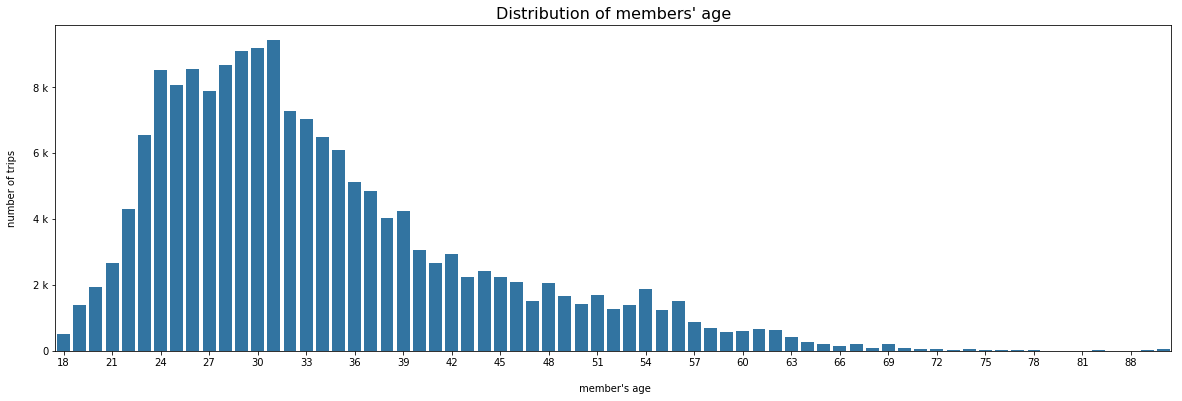

In [10]:
bikes["member_age_new"] = np.where(bikes["member_age"] >= 100, 100,  bikes["member_age"] )
bikes.member_age_new = bikes.member_age_new.astype(int)

# create the plot 
ax=plt.figure(figsize = [20,6])
base_color = sb.color_palette()[0]
ax=sb.countplot(data = bikes, x = 'member_age_new', color = base_color)

# ensure that the labels are created:
ax=plt.draw()
# get x tick labels and position
loc, label = plt.xticks()
# set the xticks for every second (original) xtick
ax=plt.xticks(loc[::3],label[::3])   

ax=plt.title("Distribution of members' age", fontsize=16, y=1.015)
ax=plt.ylabel('number of trips', labelpad=16)
ax=plt.xlabel(" member's age", labelpad=16)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    
ax=plt.gca().yaxis.set_major_formatter(EngFormatter())


## Distribution members age (grouped)

Since members' age has a large hange of values, member's age was agrouped in clusters of 10 years. This graph highlights the mority of trips per users between 18 and 29 years old.

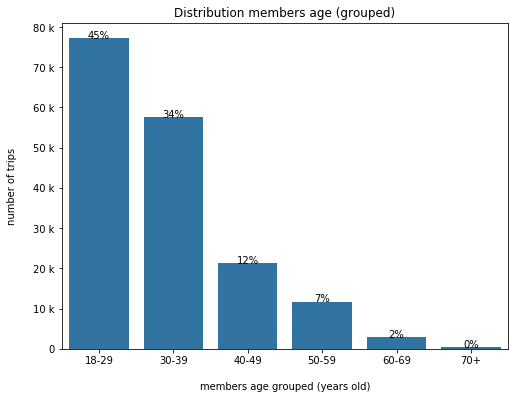

In [12]:
plt.figure(figsize=(8,6))
sb.countplot(data = bikes, x = 'age_grouped', color = base_color)

plt.title('Distribution members age (grouped)')
plt.xlabel('members age grouped (years old)', labelpad=16)
plt.ylabel('number of trips', labelpad=16)

# add annotations
n_points = bikes.shape[0]
cat_counts = bikes['age_grouped'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

for loc, label in zip(locs, labels):
    #get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]    
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.gca().yaxis.set_major_formatter(EngFormatter())

## Member gender vs. member age
### Learning with the errors

In a bivariate exploration for outliers in member's age and user's gender using a scatter graph. People said as Male and as Others have errors greater than people said as Female. Interestingly, it seems that only women are careful when entering the birth age and do not make gross mistakes. The genders men and others are said to be older than not just the outlier (60 years old) but also the life expectancy in the USA (78 years old).


Text(0, 0.5, "member's age (years old)")

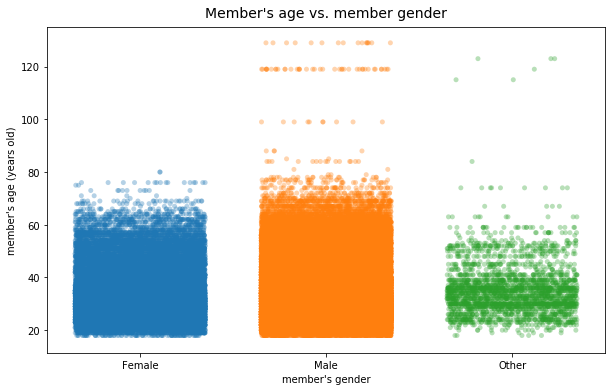

In [11]:
plt.figure(figsize=(10,6))
# create a numeric variable from the string 'member_age' 
# variable
bikes['member_age'] = bikes.member_age.astype(float)
# scatterplot (jittered) - age and gender
sb.stripplot(data = bikes, x = 'member_gender', y = 'member_age',
           jitter = 0.35 , alpha =  1/3);
plt.title("Member's age vs. member gender", fontsize=14, y=1.01)
plt.xlabel("member's gender")
plt.ylabel("member's age (years old)")


## Analysis of users and their behavior
### Account of trip across weekdays, age grouped, user type and member gender

An exploration considering the number of trips gave us some insights about the demand for bikes during the weekdays, member's characteristics and user type. People between 18 and 29 years old are the majority on the number of trips; then between 30 and 39 and so progressively. People until 39 use relatively more these bikes than the older ones. Workdays have a higher demand for bikes, while Saturday has a lower demand. The number of trips for subscribers is significantly higher than for customers. The trip number of subscribers customers is stable during the weekdays. Workdays have a higher demand for bikes, while Saturday has lower demand, considering the number of trips. Men make 75% of the trips, women make 24% and other make 1.6%. The percentage of subscribers is higher than customers in both genders.


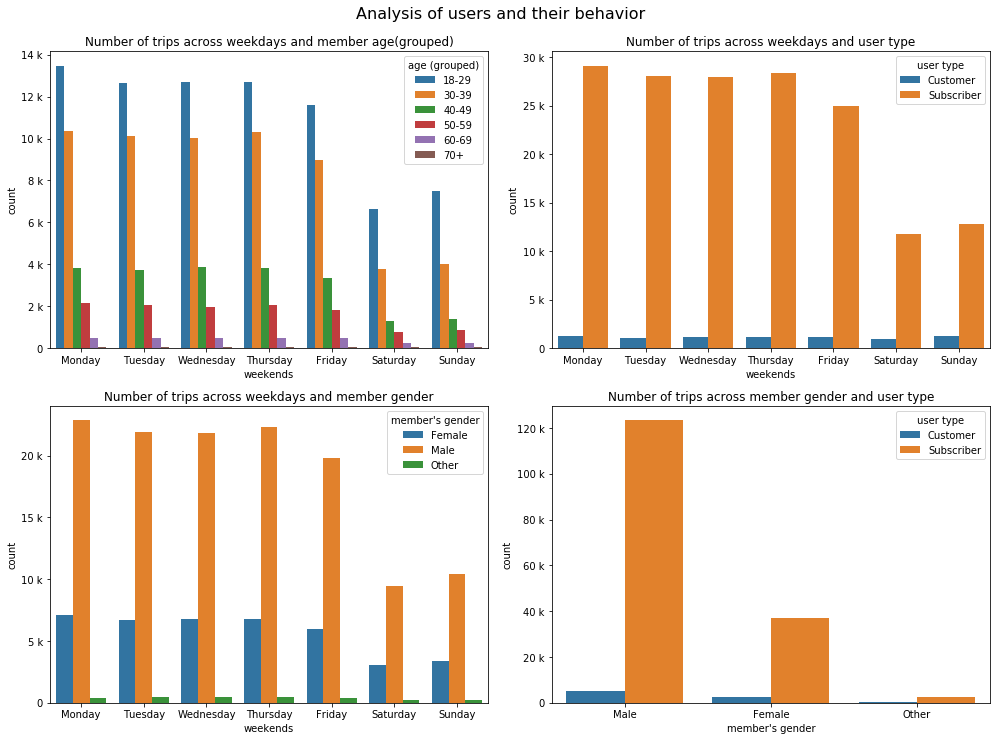

In [16]:
#Accounts trip in weekdays vs. age grouped, user type and mermber gender 

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize = [14,10])

base_color = sb.color_palette()[0]
plt.suptitle('Analysis of users and their behavior', fontsize=16, y=1.025)

ax1=plt.subplot(2, 2, 1)
ax1=sb.countplot(data = bikes, x = 'weekdays', hue = 'age_grouped', 
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax1=plt.title('Number of trips across weekdays and member age(grouped)')
ax1=plt.legend(title='age (grouped)')
ax1=plt.xlabel('weekends')
ax1=plt.gca().yaxis.set_major_formatter(EngFormatter())

ax2=plt.subplot(2, 2, 2)
ax2=sb.countplot(data = bikes, x = 'weekdays', hue = 'user_type', 
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax2=plt.title('Number of trips across weekdays and user type')
ax2=plt.legend(title='user type')
ax2=plt.xlabel('weekends')
ax2=plt.gca().yaxis.set_major_formatter(EngFormatter())

ax3=plt.subplot(2, 2, 3)
ax3=sb.countplot(data = bikes, x = 'weekdays', hue = 'member_gender', 
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax3=plt.title('Number of trips across weekdays and member gender')
ax3=plt.legend(title="member's gender")
ax3=plt.xlabel('weekends')
ax3=plt.gca().yaxis.set_major_formatter(EngFormatter())

ax4=plt.subplot(2, 2, 4)
ax4=sb.countplot(data = bikes, x = 'member_gender', hue = 'user_type', 
             order = ['Male','Female','Other'])
ax4=plt.title('Number of trips across member gender and user type')
ax4=plt.legend(title='user type')
ax4=plt.xlabel("member's gender")
ax4=plt.gca().yaxis.set_major_formatter(EngFormatter())

plt.tight_layout()

## Duration of trips across weekdays and member's age  (grouped)

Comparing age member (grouped) across weekdays and duration of trips duration of trip until 30 minutes and longer trips, we can see that there are less longer trips, specialy in workdays. Te duration of trip of youngers is more stable than the olders, these have higher variation. Strangely, the behavior of 70+ change on Wednesdays and om Fridays. 


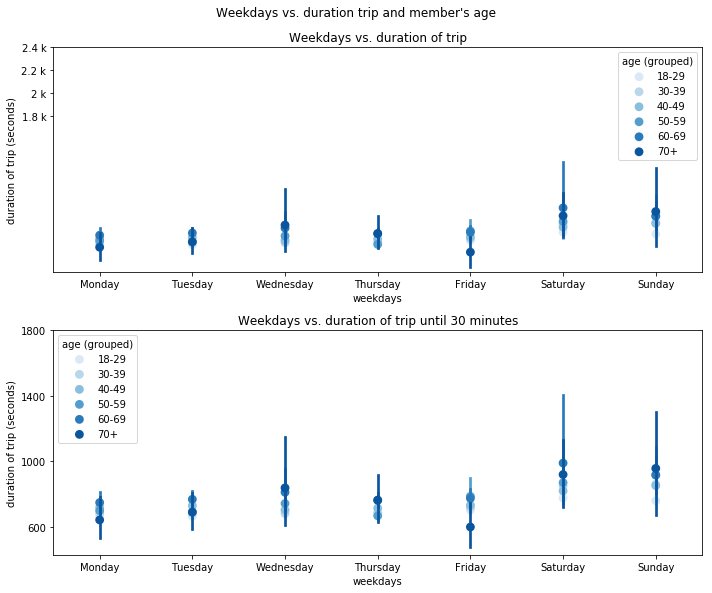

In [15]:
fig, (ax1,x2) = plt.subplots(nrows=2, ncols=1,figsize = [10,8])

plt.suptitle("Weekdays vs. duration trip and member's age", y=1.025)

ax1=plt.subplot(2,1,1)
ax1=sb.pointplot(data = bikes, x= 'weekdays', y = 'duration_sec', 
                 hue = 'age_grouped', palette = 'Blues', linestyles = '')
ax1=plt.ylabel('duration of trip (seconds)')
ax1=plt.title('Weekdays vs. duration of trip')
ax1=plt.yticks([1.8e3, 2.0e3,2.2e3, 2.4e3])
ax1=plt.legend(title='age (grouped)')
ax1=plt.gca().yaxis.set_major_formatter(EngFormatter())

ax2=plt.subplot(2,1,2)
ax2=sb.pointplot(data = bikes, x= 'weekdays', y = 'duration_sec', 
                 hue = 'age_grouped', palette = 'Blues', linestyles = '')
ax2=plt.ylabel('duration of trip (seconds)')
ax2=plt.title('Weekdays vs. duration of trip until 30 minutes')
ax2=plt.yticks([600, 1000,1400,1800]) # 30 minutes
ax2=plt.legend(title='age (grouped)')

plt.tight_layout()

## Member's age and duration of trip across "bike share for all trip"

Confronting member's age and duration of the trip with the "bike share for all trip" boolean, we can see that the older are the users that share the bike for the entire trip, the longer the trips.

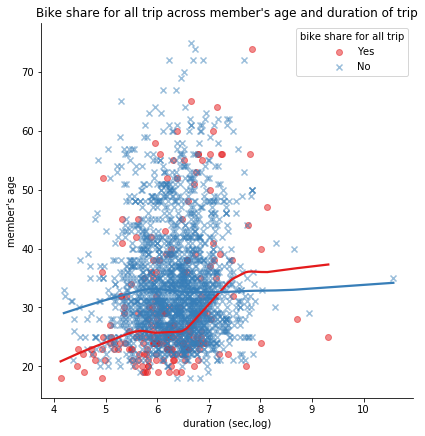

In [13]:
g = sb.lmplot(x="duration_sec_log", y="member_age", hue="bike_share_for_all_trip", data=bikes_samp500, palette="Set1",  
              markers=["o","x"], scatter_kws={'alpha': 0.5}, height=6, lowess=True,legend=False)

g = plt.title("Bike share for all trip across member's age and duration of trip")
g = plt.legend(title='bike share for all trip')
g = plt.xlabel("duration (sec,log)")
g = plt.ylabel("member's age")

In [14]:
#!jupyter nbconvert slide_deck_template-KC.ipynb --to slides --post serve --template output_toggle